In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet_uniform import *
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

Test U-Net

In [2]:
data = dataset_uniform()
loaders = get_loaders(data, 1)

In [4]:
#name = 'NN_library/ConvNet/Conv_w_AutoUnet_uniform'
name = 'NN_library/ConvNet/ConvNet_uniform'
args = {'lr' : 0.001, 'epochs' : 20, 'dev' : dev, 'name' : name}
net = ConvNet(16)
net = load_network(net, args['name'], args)

In [5]:
L_stiff, L_shr = test(net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)

In [9]:
shr_mean = L_shr.mean()
shr_std = L_shr.std()
stiff_mean = L_stiff.mean()
stiff_std = L_stiff.std()
print('Mean shrinkage, %:', 100 * shr_mean, 'Std shrinkage, %:', 100 * shr_std)
print('Mean stiffness, %:', 100 * stiff_mean, 'Std stiffness, %:', 100 * stiff_std)

Mean shrinkage, %: 0.9203541092574596 Std shrinkage, %: 0.8851966820657253
Mean stiffness, %: 1.3760020025074482 Std stiffness, %: 1.63392573595047


In [7]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print('Final mean shrinkage, %:', 100 * shr_mean[-1], 'Final std shrinkage, %:', 100 * shr_std[-1])
print('Final mean stiffness, %:', 100 * stiff_mean[-1], 'Final std stiffness, %:', 100 * stiff_std[-1])

Final mean shrinkage, %: 1.3631487265229225 Final std shrinkage, %: 1.1729134246706963
Final mean stiffness, %: 2.4185549467802048 Final std stiffness, %: 2.181856520473957


Text(0, 0.5, 'Stiffness loss')

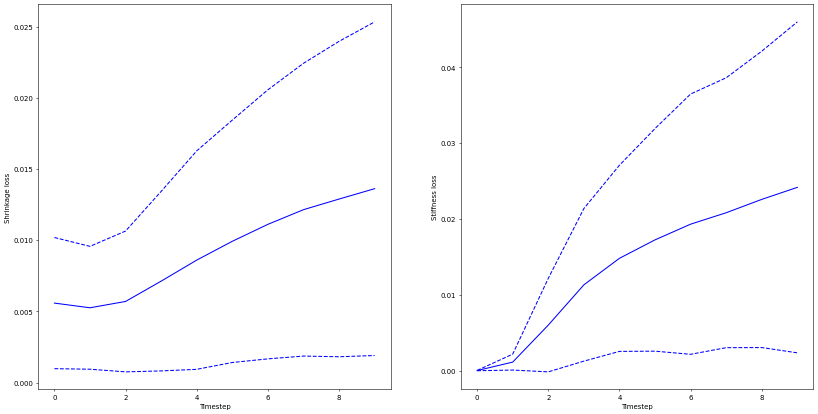

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')

In [16]:
unet = AutoUNet()
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_uniform', args)

In [17]:
L_stiff, L_shr = test_w_Auto(unet, net, loaders, args)
L_shr = np.array(L_shr)
L_stiff = np.array(L_stiff)
shr_mean = L_shr.mean()
shr_std = L_shr.std()
stiff_mean = L_stiff.mean()
stiff_std = L_stiff.std()
print('Mean shrinkage, %:', 100 * shr_mean, 'Std shrinkage, %:', 100 * shr_std)
print('Mean stiffness, %:', 100 * stiff_mean, 'Std stiffness, %:', 100 * stiff_std)

Mean shrinkage, %: 1.0206075385212898 Std shrinkage, %: 0.9816905483603477
Mean stiffness, %: 1.4364677481353283 Std stiffness, %: 1.6837680712342262


In [18]:
shr_mean = np.mean(L_shr, axis=0)
shr_std = np.std(L_shr, axis=0)
stiff_mean = np.mean(L_stiff, axis=0)
stiff_std = np.std(L_stiff, axis=0)
print('Final mean shrinkage, %:', 100 * shr_mean[-1], 'Final std shrinkage, %:', 100 * shr_std[-1])
print('Final mean stiffness, %:', 100 * stiff_mean[-1], 'Final std stiffness, %:', 100 * stiff_std[-1])

Final mean shrinkage, %: 1.5105010941624641 Final std shrinkage, %: 1.2625186704099178
Final mean stiffness, %: 2.4864982813596725 Final std stiffness, %: 2.2198323160409927


Text(0, 0.5, 'Stiffness loss')

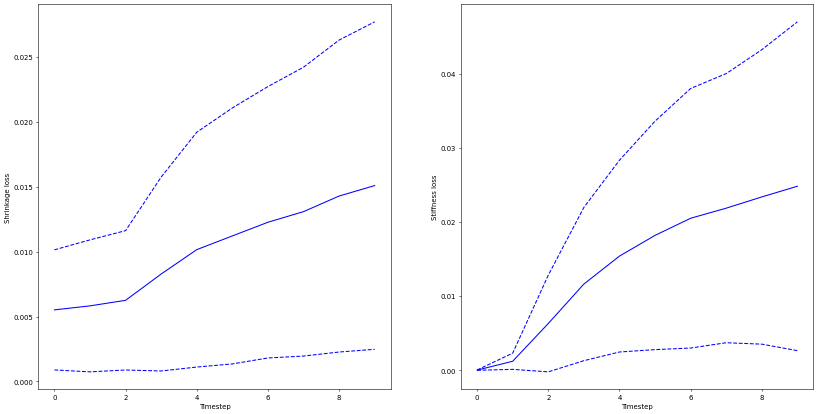

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=50)

axs.flat[0].plot(shr_mean, 'b')
axs.flat[0].plot(shr_mean+shr_std, 'b--')
axs.flat[0].plot(shr_mean-shr_std, 'b--')
axs.flat[0].set_xlabel('Timestep')
axs.flat[0].set_ylabel('Shrinkage loss')

axs.flat[1].plot(stiff_mean, 'b')
axs.flat[1].plot(stiff_mean+stiff_std, 'b--')
axs.flat[1].plot(stiff_mean-stiff_std, 'b--')
axs.flat[1].set_xlabel('Timestep')
axs.flat[1].set_ylabel('Stiffness loss')